# Analyze A/B Test Results 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Conclusion](#conclusion)
 
 
<a id='intro'></a>
## Introduction

This report analyzes a dataset containing data from 2 versions of a webpage (old & new) to calculate probability, z-score, and p-values as well as display graphics, other statistics. A regression model will be created/modified and a second dataset (data from the various countries comprising the dataset) will be joined to further analyze and help aid in the decision to continue operating the old page or implement the new page. 

<a id='probability'></a>
## Part I - Probability

In [4516]:
# Import Libraries for functionality and features.
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

# Setting the seed to assure synchronous answers for reviewers.
random.seed(42)

In [4517]:
# Reads the file data into a created dataframe (df)
# and displays the first 3 lines.
df  = pd.read_csv('ab_data.csv')

df.head(3)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0


In [4518]:
# Calculates and displays the total length 
# (number of rows/records) in the dataframe.
tot_len = len(df)

print('\nThere are', tot_len, 'rows/records in the dataframe.\n')


There are 294478 rows/records in the dataframe.



In [4519]:
# Displays the number of unique values in the dataset 
# - 290584 unique user_ids.
print(df.nunique())

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64


In [4520]:
# Calculates the total number of users 
# that converted and displays.
conv = (df['converted'] == 1).sum()

print('\nThere are', conv, 'users that converted.\n')


There are 35237 users that converted.



In [4521]:
# Calculates the total number of users 
# that did not convert and displays.
not_conv = (df['converted'] == 0).sum()

print('\nThere are', not_conv, 'users that did not convert.\n')


There are 259241 users that did not convert.



In [4522]:
# Calculates the proportion of users 
# that converted and displays.
conv_perc = (conv / tot_len)

# For aesthetics.
perc_sym = '%'

print('\nThe proportion of users that converted is ' + 
      str(round(conv_perc * 100, 3)) + perc_sym, '\n')


The proportion of users that converted is 11.966% 



In [4523]:
# Calculates the proportion of users 
# that did not convert and displays.
not_conv_perc = (not_conv / tot_len)

print('\nThe proportion of users that did not convert is ' + 
      str(round(not_conv_perc * 100, 3)) + perc_sym, '\n')


The proportion of users that did not convert is 88.034% 



In [4524]:
# A Boolean check if any of the rows have 
# NULL/missing values and displays the result.
val_nul = df[((df['group'] == 'treatment') & 
          (df['landing_page'] != 'new_page'))].isnull().values.any()

if val_nul == False:
    print('\nThere are no NULL/missing values in the dataframe.\n')

else:
     print('\nThere are NULL/missing values in the dataframe.\n')   


There are no NULL/missing values in the dataframe.



In [4525]:
# The number of times 'group' is treatment and 
# 'landing_page' is not a new_page.
treat_old = df[((df['group'] == 'treatment') &
            (df['landing_page'] != 'new_page'))]

treat_old = treat_old.count().mean().astype('int')

# Displays the number of rows with incorrect information.
print('\nThere are', treat_old, 'rows with'
      ' "incorrect" information for the treatment group.\n')


There are 1965 rows with "incorrect" information for the treatment group.



In [4526]:
# The number of times 'group' is control and 
# 'landing_page' is not an old_page.
cont_new = df[((df['group'] == 'control') &
            (df['landing_page'] != 'old_page'))]

cont_new = cont_new.count().mean().astype('int')

# Displays the number of rows with incorrect information.
print('\nThere are', cont_new, 'rows with'
      ' "incorrect" information for the control group.\n')


There are 1928 rows with "incorrect" information for the control group.



In [4527]:
# Calculate the total number of rows containing incorrect 
# information to compare after modifications are made.
incrct_info = cont_new + treat_old

print('\nThere are a total of', incrct_info, 
      'rows/records with incorrect values that '
      'shall be removed from the dataframe.\n')


There are a total of 3893 rows/records with incorrect values that shall be removed from the dataframe.



In [4528]:
# Creates a new dataframe (copy of the original dataframe)
# and displays the row and column lengths.
df2 = df.copy()

print('\nThere are', df2.shape[0], 'rows and', df2.shape[1], 
      'columns in the new copy of the dataframe.\n')


There are 294478 rows and 5 columns in the new copy of the dataframe.



In [4529]:
# Removes the inaccurate rows, and stores the results in df2.
df2 = df2.loc[~((df2['group'] == 'treatment') & 
                (df2['landing_page'] == 'old_page') |
                (df2['group'] == 'control') & 
                (df2['landing_page'] == 'new_page'))]

# Displays changes to the datframe, in comparison.
print('\nThere are', df2.shape[0], 'rows, and',  
      df2.shape[1], 'columns in the dataframe.\n')


There are 290585 rows, and 5 columns in the dataframe.



In [4530]:
# Calculates the number of rows that had 
# incorrect information and were removed.
incrct_rows = tot_len - df2.shape[0]

print('\nThere were', incrct_rows, 'rows/records '
      'with incorrect values removed from the dataframe.\n')


There were 3893 rows/records with incorrect values removed from the dataframe.



In [4531]:
# Verifies that all of the incorrect rows were removed 
# from the df2 dataframe and displays.
print(df2[((df2['group'] == 'treatment') == 
           (df2['landing_page'] == 'new_page')) == False].shape[0])

0


In [4532]:
# Counts the number of unique users (user_ids) and displays.
uniq_cnt = df2['user_id'].nunique()

print('\nThere are', uniq_cnt, 'unique user_ids.\n')


There are 290584 unique user_ids.



In [4533]:
# Calculates the total length of the dataframe and compares to the unique 
# count, which returns the number of duplicate row(s) in the dataframe. 
tot_len3 = len(df2)

dup_cnt = (tot_len3 - uniq_cnt)

print('\nThere is', dup_cnt, 'duplicated row in the dataframe.\n')


There is 1 duplicated row in the dataframe.



In [4534]:
# Stores the located duplicate row and displays.
dup_row = df2.loc[df2['user_id'].duplicated()]

# Displays the duplicated row.
dup_row

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


### The duplicated row is displayed  - the user_id is 773192 (index number 2893).

In [4535]:
# Stores the value of the user_id from the duplicate row.
dup_usr_id = dup_row.user_id.values

# Locates 'all' user_ids that match the duplicate.
dup_rows = df2.loc[df2['user_id'] == dup_usr_id[0]]

# Displays the duplicate rows.
dup_rows 

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


### The 2 duplicate rows are displayed  - mostly identical, except for the timestamp (and index number).

In [4536]:
# Stores and displays the index number value of the duplicate row.
dup_indx = dup_row.index

print('\nThe row with the index number',  
      dup_indx[0], 'is the duplicate record.\n')


The row with the index number 2893 is the duplicate record.



In [4537]:
# Removes the indexed row that has a duplicate 
# user_id and displays a verification.
df2.drop(dup_indx, inplace = True)

In [4538]:
# The new total length of the dataframe.
tot_len4 = len(df2)

# Creates a variable and stores a Boolean response to a
# comparison between the dataframe length and unique values count
# to verify that the row with a duplicate user_id is deleted.
vrfy_cnt = (tot_len4 == uniq_cnt)

# Conditional statement to verify the duplicate row has been dropped.
if vrfy_cnt == True:
    
    print('\nThe number of rows in the dataframe is ' + str(tot_len4) + '.\n')
    
    print('\nThe duplicated record has been removed.\n')

else:
    
    print('\nThe number of rows in the dataframe is ' + str(tot_len4) + '.\n')
    
    print('\nThe duplicated record has not been removed.\n')


The number of rows in the dataframe is 290584.


The duplicated record has been removed.



In [4539]:
# Calculates and displays the percentage (probability) 
# of individuals that received the new_page.
new_page_cnt = df2[df2['landing_page'] == 'new_page']

new_page_perc = new_page_cnt.count().mean() / len(df2)

print('\nThe probability that an individual received the new ' 
      'page is ' +str(round(new_page_perc * 100, 3)) + perc_sym + '.\n')


The probability that an individual received the new page is 50.006%.



In [4540]:
# Calculates and displays the percentage (probability) 
# of individuals that received the old_page.
old_page_cnt = df2[df2['landing_page'] == 'old_page']

old_page_perc = old_page_cnt.count().mean() / len(df2)

print('\nThe probability that an individual received the old '
      'page is ' + str(round(old_page_perc * 100, 3)) + perc_sym + '.\n')


The probability that an individual received the old page is 49.994%.



In [4541]:
# Calculates and displays the length of the control group.
cont_len = len(df2[(df2['group'] == 'control')])

print('\nThe total number of individuals in the '
      'control group is ' + str(cont_len) + '.\n')


The total number of individuals in the control group is 145274.



In [4542]:
# Calculates and displays the length of the treatment group.
treat_len = len(df2[((df2['group'] == 'treatment'))])

print('\nThe total number of individuals in the treatment '
      'group is ' + str(treat_len) + '.\n')


The total number of individuals in the treatment group is 145310.



In [4543]:
# Calculates and displays the number of individuals 
# that converted in the control group.
cont_conv = df2[((df2['group'] == 'control') & 
                 (df2['converted'] == 1))]

cont_conv = cont_conv.count().mean().astype('int')

print('\nThe total number of individuals in the control '
      'group that converted is ' + str(cont_conv) + '.\n')


The total number of individuals in the control group that converted is 17489.



In [4544]:
# Calculates and displays the number of individuals 
# that converted in the treatment group.
treat_conv = df2[((df2['group'] == 'treatment') & 
                  (df2['converted'] == 1))]

treat_conv = treat_conv.count().mean().astype('int')

print('\nThe total number of individuals in the treatment '
      'group that converted is ' + str(treat_conv) + '.\n')


The total number of individuals in the treatment group that converted is 17264.



In [4545]:
# Calculates and displays the probability 
# that a user will convert in the control group.
cont_conv_perc = (cont_conv / cont_len) 

print('\nThe probability that a user will convert in the '
      'control group is ' + str(round(cont_conv_perc * 100, 3)) + 
      perc_sym + '.\n')


The probability that a user will convert in the control group is 12.039%.



In [4546]:
# Calculates and displays the probability 
# that a user will convert in the treatment group.
treat_conv_perc = (treat_conv / treat_len)

print('\nThe probability that a user will convert in the '
      'treatment group is ' + str(round(treat_conv_perc  * 100, 3)) + 
      perc_sym + '.\n')


The probability that a user will convert in the treatment group is 11.881%.



In [4547]:
# Displays the average of conversion rates
# for the control and treatment groups pages.
print('\nThe probability that a user will convert, '
      'regardless of the page they receive is ' +
      str(round(conv_perc * 100, 3)) + perc_sym + '.\n')


The probability that a user will convert, regardless of the page they receive is 11.966%.



In [4548]:
# Calculates and displays the actual difference (obs_diff) 
# between the conversion rates for the two groups.
obs_diff = (treat_conv_perc - cont_conv_perc)

print('\nThe actual observed difference of conversion rates '
      'between the two groups is ' + 
      str(round(obs_diff  * 100, 3)) + perc_sym + '.')


The actual observed difference of conversion rates between the two groups is -0.158%.


### The conversion rate of the old page (control) is approximately .158% higher than the new page (treatment). 

<a id='ab_test'></a>
## Part II - AB Test

### Null Hypothesis:

### H0: Pnew ≤ Pold

### H1: Pnew > Pold

In [4549]:
# Creates a variable and displays the number 
# of individuals in the control group (Nold).
n_old = cont_len

print('\nThere are', n_old, 'individuals in the control group.\n')


There are 145274 individuals in the control group.



In [4550]:
# Creates a variable and displays the number 
# of individuals in the treatment group (Nnew)
n_new = treat_len

print('\nThere are', n_new, 'individuals in the treatment group.\n')


There are 145310 individuals in the treatment group.



In [4551]:
# Creates a variable and displays the conversion  
# rate for Pnew = Pold (actual conversion).
p_old = cont_conv_perc

print('\nThe conversion rate for the control group, ' 
      'p_old, is ' + str(round(p_old * 100, 3)) + 
      perc_sym + '.\n')


The conversion rate for the control group, p_old, is 12.039%.



In [4552]:
# Creates a variable and displays the conversion  
# rate for Pnew = Pold(actual conversion).
p_new = cont_conv_perc

print('\nThe conversion rate for the treatment group, ' 
      'p_new, is ' + str(round(p_new * 100, 3)) + 
      perc_sym + '.')


The conversion rate for the treatment group, p_new, is 12.039%.


## Simulate Samples & Sample Distribution

In [4553]:
# Simulates an average of probable converted values for the 
# treatment group and stores the result in a numpy array.
new_page_conv = np.random.binomial(1, p_new, n_new).mean()

print('\nThe simulated conversion rate for the treatment group, '
      'new page, is ' + str(round(new_page_conv * 100, 3)) + 
      perc_sym + '.\n')


The simulated conversion rate for the treatment group, new page, is 12.084%.



In [4554]:
# Simulates an average of probable converted values for the 
# control group and stores the result in a numpy array.
old_page_conv = np.random.binomial(1, p_old, n_old).mean()

print('\nThe simulated conversion rate for the control group, '
      'old page, is ' + str(round(old_page_conv * 100, 3)) + 
      perc_sym + '.\n')


The simulated conversion rate for the control group, old page, is 11.975%.



In [4555]:
# Calculates and displays the difference between the 
# treatment (new_page) and control (old_page) groups.
samp_diff = new_page_conv - old_page_conv

print('\nThe difference in the simulated conversion rates '
      'between the 2 groups is ' + str(abs(round(samp_diff * 100, 3))) + 
      perc_sym + '.\n')


The difference in the simulated conversion rates between the 2 groups is 0.109%.



In [4556]:
# Displays the average of conversion rates for
# the simulated control and treatment groups pages.

sim_pages_avg = ((old_page_conv + new_page_conv) / 2)

print('\nThe average of simulated conversion rates, '
      'regardless of the page they received is ' +
      str(round(sim_pages_avg * 100, 3)) + perc_sym + '.\n')


The average of simulated conversion rates, regardless of the page they received is 12.029%.



In [4557]:
# Creates a list to store values in.
p_diffs = np.random.binomial(n_old, p_old, 10000)/n_old - np.random.binomial(n_new, p_new, 10000)/n_new 

# Displays a verification of the list being 
# created or potential error.
if len(p_diffs) == 10000:
    print('\nThe list of 10,000 sampling probabilities '
          'has been created without error.\n')

else:
    print('\nThe list of 10,000 sampling probabilities '
          'did not get created - there may be an error.\n')


The list of 10,000 sampling probabilities has been created without error.



In [4558]:
# Converts the p_diffs list to p_diffs NumPy array 
# and displays to verify.
p_diffs = np.asarray(p_diffs)

print('\n' + str(p_diffs))


[ 0.00088329 -0.00105773 -0.00038314 ...  0.00189515  0.00113104
 -0.00032087]


### Histogram

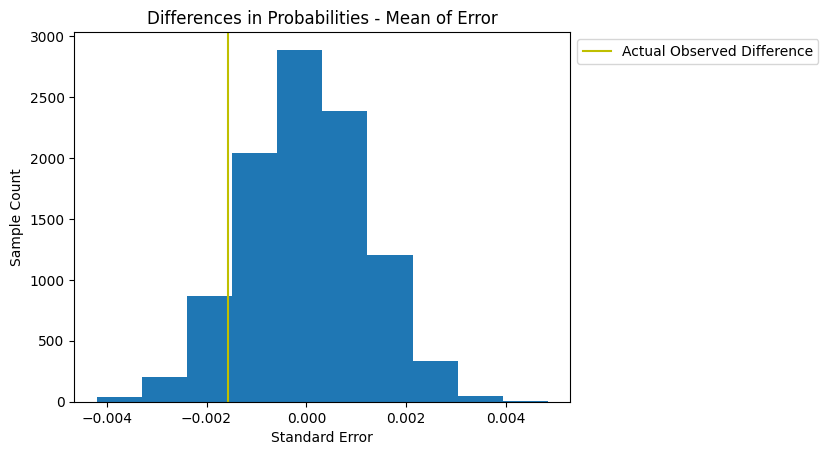

In [4559]:
# Creates a histogram of the p_diffs array data,
# and adds a title as well as axes labels.
plt.hist(p_diffs)
plt.title('Differences in Probabilities - Mean of Error')
plt.xlabel('Standard Error')
plt.ylabel('Sample Count')

# Plots a verticle line for the actual observed difference.
plt.axvline(x = obs_diff, color = 'y', 
            label = 'Actual Observed Difference')

# Create and place a legend outside for the 
# actual observed difference vertical line.
plt.legend(bbox_to_anchor = (1, 1), loc = 'upper left')

In [4560]:
p_diffs.mean()

5.026356631709467e-06

In [4561]:
# Creates variables to store calculations for 
# the conditional statement.
obs_sim_diff1 = obs_diff.mean() - p_diffs.mean() 
obs_sim_diff2 = p_diffs.mean() - obs_diff.mean()

p_val = ((p_diffs.mean() + obs_diff.mean()) / 2)

print('\nThe actual observed differences average is ' + 
      str(abs(round(obs_diff.mean() * 100, 4))) + perc_sym + '.\n')

print('\nThe simulated differences average is ' + 
      str(abs(round(p_diffs.mean() * 100, 4))) + perc_sym + '.\n')

print('\nThe p-value is ' + str(abs(round(p_val * 100, 4))) + 
      perc_sym + '.\n')

if obs_sim_diff1 > 0:
    print('\nThe actual observed differences average is ' 
          + str(abs(round(obs_sim_diff1 * 100, 4))) + perc_sym + 
          ' higher than the mean of simulated differences.')
else:
    print('\nThe simulated differences average is ' 
          + str(abs(round(obs_sim_diff2 * 100, 4))) + perc_sym + 
          ' higher than the mean of actual observed differences.')


The actual observed differences average is 0.1578%.


The simulated differences average is 0.0005%.


The p-value is 0.0787%.


The simulated differences average is 0.1583% higher than the mean of actual observed differences.


### The initial p-value was calculated for the actual observed differences of probabilities and a z-score was created in a simulation which resulted in a second p-value having a difference of approximately .16%. 

In [4562]:
# Calculates and displays the proportion of the sample 
# probabilities differeneces averages (p_diffs) that 
# are greater than the actual observed differences average.
p_val_dist = (p_diffs > obs_diff).mean()

print('\nThe proportion of the sample probabilities differences '
      'that is greater than the actual differences observed is ' 
      + str(round(p_val_dist, 4)) + '.\n')

print('\nThe proportion of the simulated mean of probabilities '
      'that is greater than the observed differences is ' 
      + str(round(p_val_dist * 100, 3)) + perc_sym + '.')


The proportion of the sample probabilities differences that is greater than the actual differences observed is 0.9029.


The proportion of the simulated mean of probabilities that is greater than the observed differences is 90.29%.


In [4563]:
# Creates and displays a variable that stores the result of a 
# Boolean expression, which compares if the proportional probabilities
# differences value is greater than the Type I error rate of 0.05.
err_rate = 0.05
p_val_check = (p_val > err_rate)

p_val_err1 = (p_val - err_rate)
p_val_err2 = (err_rate - p_val)

# Conditional statement to display the results and statemnets.
if p_val_check == True:
    
    print('\nThe p-value of ' + str(round(p_val, 4)) + ' is greater than'
          ' the Type I error rate of ' + str(err_rate) + '.\n')
    
    print('\nThe p-value of ' + str(round(p_val * 100, 2)) + perc_sym +
        ' is ' +  str(round((p_val_err1 * 100), 2)) + 
        perc_sym +' higher than the Type I error rate of ' +
        str(err_rate * 100) + perc_sym + '.')

else:
    
    print('\nThe p-value of ' + str(round(p_val, 4)) + ' is less than'
          ' the Type I error rate of ' + str(err_rate) + '.\n')
    
    print('\nThe p-value of ' + str(round(p_val * 100, 2)) + perc_sym +
        ' is ' +  str(round((p_val_err2 * 100), 2)) + 
        perc_sym +' lower than the Type I error rate of ' + 
        str(err_rate * 100) + perc_sym + '.')


The p-value of -0.0008 is less than the Type I error rate of 0.05.


The p-value of -0.08% is 5.08% lower than the Type I error rate of 5.0%.


### There is insufficient data to reject the null based upon the negligible differences. 

In [4564]:
# The number of conversions with the old_page (control).
convert_old = cont_conv

# The number of conversions with the new_page (treatment).
convert_new = treat_conv

# The number of individuals who were shown the old_page (control).
n_old = cont_len

# The number of individuals who received new_page (treatment).
n_new = treat_len

In [4565]:
# Performing a z-test to calculate the z-score and p-value, 
# as well as store the results in the variables.
z_score, p_val2 = sm.stats.proportions_ztest(
    [convert_new, convert_old], [n_new, n_old], 
    alternative = 'smaller')

# Displays the z-score and p-value aesthetically.
print('\nThe z-score is ' + str(round(z_score, 3)) + '.\n')
print('The p-value is ' + str(round(p_val2, 4)) + perc_sym + '.')


The z-score is -1.311.

The p-value is 0.0949%.


## Two-Sample z-test

### Null Hypothesis:

### H1: Pnew ≤ Pold

### H1: Pnew > Pold

In [4566]:
# Creates and displays a variable that stores the result of a 
# Boolean expression, which compares if the proportional probabilities
# differences value is greater than the Type I error rate of 0.05.
p_val_check2 = (p_val2 > 0.05)

# Calculations for display in conditional statement.
p_val_err1 = (p_val2 - err_rate)
p_val_err2 = (err_rate - p_val2)

# Conditional statements to display the results and statements.
if p_val_check2 == True:
        
    if z_score > 0:
    
        print('\nThe z-score is ' + str(round(z_score, 3)) + 
          ' standard deviations above the mean.\n')

        print('\nThe p-value of ' + str(round(p_val2, 4)) + ' is greater than'
              ' the Type I error rate of ' + str(err_rate) + '.\n')

        print('\nThe average percentage of sample differences of ' + 
            str(round(p_val2 * 100, 2)) + perc_sym +
            ' is ' +  str(round((p_val_err1 * 100), 2)) + 
            perc_sym +' higher than the Type I error rate of ' +
            str(err_rate * 100) + perc_sym + '.\n')
    
    else:

        print('\nThe z-score is ' + str(abs(round(z_score, 3))) + 
          ' standard deviations below the mean.\n')

        print('\nThe p-value of ' + str(round(p_val2, 4)) + ' is greater than'
              ' the Type I error rate of ' + str(err_rate) + '.\n')

        print('\nThe average percentage of sample differences of ' + 
            str(round(p_val2 * 100, 2)) + perc_sym +
            ' is ' +  str(abs(round((p_val_err2 * 100), 2))) + 
            perc_sym +' higher than the Type I error rate of ' +
            str(err_rate * 100) + perc_sym + '.\n')
        
else:    

    if z_score > 0:
    
        print('\nThe z-score is ' + str(round(z_score, 3)) + 
             ' standard deviations above the mean.\n')

        print('\nThe p-value of ' + str(round(p_val2, 4)) + ' is less than'
            ' the Type I error rate of ' + str(err_rate) + '.\n')

        print('\nThe average percentage of sample differences of ' + 
            str(round(p_val2 * 100, 2)) + perc_sym +
            ' is ' +  str(abs(round((p_val_err1 * 100), 2))) + 
            perc_sym +' higher than the Type I error rate of ' +
            str(err_rate * 100) + perc_sym + '.\n')
    
    else:

        print('\nThe z-score is ' + str(abs(round(z_score, 3))) + 
            ' standard deviations below the mean.\n')

        print('\nThe p-value of ' + str(round(p_val2, 4)) + ' is less than'
             ' the Type I error rate of ' + str(err_rate) + '.\n')

        print('\nThe average percentage of sample differences of ' + 
            str(round(p_val2 * 100, 2)) + perc_sym +
            ' is ' +  str(round((p_val_err2 * 100), 2)) + 
            perc_sym +' lower than the Type I error rate of ' +
            str(err_rate * 100) + perc_sym + '.\n')


The z-score is 1.311 standard deviations below the mean.


The p-value of 0.0949 is greater than the Type I error rate of 0.05.


The average percentage of sample differences of 9.49% is 4.49% higher than the Type I error rate of 5.0%.



In [4567]:
# Displays statistics and observation.
print('\nThe actual observed p-value is ' + 
      str(round(p_val, 4)) + ' and the simulated ' +
      'sampling p-value is ' + str(round(p_val2, 4)) + '.\n')

print('\nThe observed p-value is ' + str(round(p_val * 100, 2)) 
      + perc_sym + ' and the simulated sample p-value is ' + 
      str(round(p_val2 * 100, 2)) + perc_sym +'.\n')

# Conditional statement to display the correct information, 
# based upon variables.
if p_val > p_val2:

    print('\nThe observed p-value is ' + 
      str(round((p_val - p_val2) * 100, 2)) + perc_sym + 
      ' higher than the simulated sample p-value.')

else:
    print('\nThe simulated sample p-value is ' + 
      str(round((p_val2 - p_val) * 100, 2)) + perc_sym + 
      ' higher than the actual observed p-value.')


The actual observed p-value is -0.0008 and the simulated sampling p-value is 0.0949.


The observed p-value is -0.08% and the simulated sample p-value is 9.49%.


The simulated sample p-value is 9.57% higher than the actual observed p-value.


### The simulated p-value is approximately 4% higher than the Type I error rate.

In [4568]:
# Creates variables for the confidence 
# interval at 95% for comparison.
z_alpha = 1.645
z_comp = z_score > z_alpha

# Displays data.
print('\nA one-tailed (right-tailed) test was performed.\n')

print('\nFor a right-tailed test, reject the null if z-score > z-alpha.\n')

print('\nThe z-score is ' + str(round(z_score, 3)) + ' and the z-alpha is ' +
     str(round(z_alpha, 3)) + '.\n')

# Conditional statement to display the correct data.
if z_score > z_alpha:
    
    print('\nThe statement "reject the null if z-score > z-alpha" is ' 
        + str(z_comp) + '.\n' )
    
    print('\nThe z-score is ' + str(round((z_score - z_alpha), 3)) + 
        ' higher than the z-alpha.\n\n' +     
        '\nThe test rejects the null because the z-score is ' + 
            str(abs(round((z_alpha - z_score), 3))) + ' higher than the z-alpha.')    

else:
    print('\nThe statement "reject the null if z-score > z-alpha" is ' 
        + str(z_comp) + '.\n' )
    
    print('\nThe z-score is ' + str(round((z_alpha - z_score), 3)) + 
        ' lower than the z-alpha.\n\n' +     
        '\nThe test fails to reject the null because the z-score is ' + 
            str(abs(round((z_alpha - z_score), 3))) + ' lower than the z-alpha.')


A one-tailed (right-tailed) test was performed.


For a right-tailed test, reject the null if z-score > z-alpha.


The z-score is -1.311 and the z-alpha is 1.645.


The statement "reject the null if z-score > z-alpha" is False.


The z-score is 2.956 lower than the z-alpha.


The test fails to reject the null because the z-score is 2.956 lower than the z-alpha.


### There is not enough discernible data to make an informed decision based upon the difference. Other factors may help define a variance to decide whether to continue utilizing the old page or implement the new page. 

### The test fails to reject the null because the z-score is lower than the z-alpha.

<a id='regression'></a>
## Part III - Regression

## Logistic Regression: 

### A logistic regression model will be utilized to analyze the statistics that include the additional binary data.

In [4569]:
# Creates a new column for the intercept, with a value of 1.
df2['intercept'] = 1

# Creates a dummy variable column - ab_page.
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']

print('\n\nThe "intercept" & "ab_page" columns have '
      'been added to the dataframe.\n')

# Displays the first 3 rows.
df2.head(3)



The "intercept" & "ab_page" columns have been added to the dataframe.



,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1


### Displays the first 3 lines of the dataframe with the 2 new columns.

In [4570]:
# Drops the group column and displays
# the first 3 rows of the dataframe.
df2.drop(['group'], inplace = True, axis=1)

df2.head(3)

,user_id,timestamp,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,new_page,0,1,1


In [4571]:
# The statsmodels function instantiates a logistical regression  
# model and stores the results in the reg_model logit object.
reg_model = sm.Logit(df2['converted'], 
                     df2[['intercept', 'ab_page']])

# Creates a table of statistics from the model data.
temp_rslt = reg_model.fit()

# Displays the table.
temp_rslt.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 03 May 2023   Pseudo R-squ.:               8.077e-06
Time:                        10:25:36   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

### An instance of the regression model displaying various statistics - the p-value is .190.

In [4572]:
# Creates a variable to compare the p-values from the 
# regression model to the observed and simulated p-values.
p_val_reg = .190

if p_val_reg > err_rate:

    print('\nThe logistic regression model p-value of ' + 
        str(round(p_val_reg * 100, 2)) + perc_sym + 
        ' is ' + str(abs(round(((p_val_reg * 100) - (err_rate * 100)), 2))) 
        + perc_sym + ' higher than the error rate of '+
        str(round(err_rate * 100, 2)) + perc_sym  + '.\n')

else:

    print('\nThe logistic regression model p-value of ' + 
        str(round(p_val_reg * 100, 2)) + perc_sym + 
        ' is ' + str(abs(round(((err_rate * 100) - (p_val_reg * 100)), 2))) 
        + perc_sym + ' lower than the error rate of ' +
        str(round(err_rate * 100, 2)) + perc_sym  + '.\n')

if p_val_reg > p_val:

    print('\nThe logistic regression model p-value of ' + 
        str(round(p_val_reg * 100, 2)) + perc_sym + 
        ' is ' + str(abs(round(((p_val_reg * 100) - (p_val * 100)), 2))) 
        + perc_sym + ' higher than the observed p-value of ' + 
        str(round(p_val * 100, 2)) + perc_sym  + '.\n')    

else:

    print('\nThe logistic regression model p-value of ' + 
        str(round(p_val_reg * 100, 2)) + perc_sym + 
        ' is ' + str(abs(round(((p_val_reg * 100) - (p_val * 100)), 2))) 
        + perc_sym + ' lower than the observed p-value of ' +
        str(round(p_val * 100, 2)) + perc_sym  + '.\n')
    
if p_val_reg > p_val2:

    print('\nThe logistic regression model p-value of ' + 
        str(round(p_val_reg * 100, 2)) + perc_sym + 
        ' is ' + str(abs(round(((p_val_reg * 100) - (p_val2 * 100)), 2))) 
        + perc_sym + ' higher than the simulated p-value of ' +
        str(round(p_val2 * 100, 2)) + perc_sym  + '.')    

else:

    print('\nThe logistic regression model p-value of ' + 
        str(round(p_val_reg * 100, 2)) + perc_sym + 
        ' is ' + str(abs(round(((p_val_reg * 100) - (p_val2 * 100)), 2))) 
        + perc_sym + ' lower than the simulated p-value of ' +
        str(round(p_val2 * 100, 2)) + perc_sym  + '.')


The logistic regression model p-value of 19.0% is 14.0% higher than the error rate of 5.0%.


The logistic regression model p-value of 19.0% is 19.08% higher than the observed p-value of -0.08%.


The logistic regression model p-value of 19.0% is 9.51% higher than the simulated p-value of 9.49%.


### The model p-value is greater than the simulated p-value because the model is one-tailed (comparative).

#### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### It may be advantageous to include additional factors to the model.

###  Adding countries to potentially discern greater differences.

In [4573]:
# Read data in from the countries.csv file,
# into a new dataframe (df3)..
df3 = pd.read_csv('countries.csv')

# Displays the first 3 rows.
df3.head(3)

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK


### Displays the first 3 rows of dataframe created from 'countries.csv'.

In [4574]:
# Creates 3 new dataframes from a join of the df3 and df2 dataframes for 3 models to compare.
df_merged = df3.set_index('user_id').join(df2.set_index('user_id'), how = 'inner').copy()
df_merged2 = df3.set_index('user_id').join(df2.set_index('user_id'), how = 'inner').copy()
df_merged3 = df3.set_index('user_id').join(df2.set_index('user_id'), how = 'inner').copy()

# Displays the first 3 rows of the new joined dataframe.
df_merged.head(3)

,country,timestamp,landing_page,converted,intercept,ab_page
user_id,,,,,,
834778,UK,2017-01-14 23:08:43.304998,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,new_page,1,1,1


### Displays the first 3 rows of the new joined dataframe.

In [4575]:
# Verify the unique country values (3).
print('\nThere are ' + str(len(df3.country.unique())) + 
      ' unique country values - ' + str(df3.country.unique()) + '.\n')


There are 3 unique country values - ['UK' 'US' 'CA'].



In [4576]:
# Creates dummy variable columns (for 3 dataframes) from the country column and displays.
df_merged[['US', 'CA', 'UK']] = pd.get_dummies(df_merged['country'])[['US', 'CA', 'UK']]
df_merged2[['US', 'CA', 'UK']] = pd.get_dummies(df_merged['country'])[['US', 'CA', 'UK']]
df_merged3[['US', 'CA', 'UK']] = pd.get_dummies(df_merged['country'])[['US', 'CA', 'UK']]

df_merged.head(1)

,country,timestamp,landing_page,converted,intercept,ab_page,US,CA,UK
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,old_page,0,1,0,0,0,1


### Displays the df_merged dataframe with 3 new dummy variable columns.

In [4577]:
# Displays to verify the dataframe was created.
df_merged2.head(1)

,country,timestamp,landing_page,converted,intercept,ab_page,US,CA,UK
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,old_page,0,1,0,0,0,1


### Displays the df_merged2 dataframe with 3 new dummy variable columns.

In [4578]:
# Displays to verify the dataframe was created.
df_merged3.head(1)

,country,timestamp,landing_page,converted,intercept,ab_page,US,CA,UK
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,old_page,0,1,0,0,0,1


### Displays the df_merged3 dataframe with 3 new dummy variable columns.

## Fit the Models for Comparison.

In [4579]:
# Creates dummy variable columns with the calculation 
# from the columns for display in a regression model.
df_merged['US_page'] = df_merged['US'] * df_merged['ab_page'].copy()
df_merged['CA_page'] = df_merged['CA'] * df_merged['ab_page'].copy()

In [4580]:
# Creates dummy variable columns with the calculation 
# from the columns for display in a 2nd regression model.
df_merged2['US_page'] = df_merged['US'] * df_merged['ab_page'].copy()
df_merged2['UK_page'] = df_merged['UK'] * df_merged['ab_page'].copy()

In [4581]:
# Creates dummy variable columns with the calculation 
# from the columns for display in a 3rd regression model.
df_merged3['UK_page'] = df_merged['UK'] * df_merged['ab_page'].copy()
df_merged3['CA_page'] = df_merged['CA'] * df_merged['ab_page'].copy()

In [4582]:
# Drop the 'country' & 'ab_page' columns 
# to avoid multicollinearity in the model.
df_merged.drop(['country', 'ab_page'], 
               inplace = True, axis=1)

In [4583]:
# The statsmodels function instantiates a logistical regression  
# model and stores the results in the reg_model2 logit object.
reg_model2 = sm.Logit(df_merged['converted'],
                      df_merged[['intercept', 'CA_page', 'US_page']])

# Creates a table of statistics from the model data.
temp_rslt2 = reg_model2.fit()

# Displays the model table.
temp_rslt2.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 03 May 2023   Pseudo R-squ.:               3.272e-05
Time:                        10:25:44   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                   0.03077
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9873      0.007   -275.573      0.000      -2.001      -1.973
CA_page       -0.0842      0.038     -2.225      0.026      -0.158      -0.010
US_page       -0.0197      0.012     -1.634      0.102      -0.043       0.004
==============================================================================
"""

### The p-value of the conversion rate in the US from the logistical regression model is 10.2%.

### The p-value in the US is greater than the Type-I error rate by 5.2%.

### The p-value of the conversion rate in CA from the logistical regression model is 2.6%.

### The p-value in CA is less than the Type-I error rate by 2.4%.

In [4584]:
# The statsmodels function instantiates a logistical regression  
# model and stores the results in the reg_model3 logit object.
reg_model3 = sm.Logit(df_merged2['converted'], 
                      df_merged2[['intercept', 'UK_page', 'US_page']])

# Creates a table of statistics from the model data.
temp_rslt3 = reg_model3.fit()

# Displays the model table.
temp_rslt3.summary()

Optimization terminated successfully.
         Current function value: 0.366117
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 03 May 2023   Pseudo R-squ.:               1.082e-05
Time:                        10:25:46   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.3164
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9926      0.008   -252.910      0.000      -2.008      -1.977
UK_page        0.0112      0.018      0.626      0.532      -0.024       0.046
US_page       -0.0144      0.012     -1.155      0.248      -0.039       0.010
==============================================================================
"""

### The p-value of the conversion rate in the US from the logistical regression model is 24.8%.

### The p-value in the US is greater than the Type-I error rate by 19.8%.

### The p-value of the conversion rate in the UK from the logistical regression model is 53.2%.

### The p-value in the UK is greater than the Type-I error rate by 48..2%.

In [4585]:
# The statsmodels function instantiates a logistical regression  
# model and stores the results in the reg_model4 logit object.
reg_model4 = sm.Logit(df_merged3['converted'], 
                      df_merged3[['intercept', 'CA_page', 'UK_page']])

# Creates a table of statistics from the model data.
temp_rslt4 = reg_model4.fit()

# Displays the model table.
temp_rslt4.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 03 May 2023   Pseudo R-squ.:               2.364e-05
Time:                        10:25:48   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                   0.08085
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9963      0.006   -322.049      0.000      -2.008      -1.984
CA_page       -0.0752      0.038     -1.997      0.046      -0.149      -0.001
UK_page        0.0149      0.017      0.862      0.389      -0.019       0.049
==============================================================================
"""

### The p-value of the conversion rate in CA from the logistical regression model is 4.6%.

### The p-value in CA is less than the Type-I error rate by .4%.

### The p-value of the conversion rate in the UK from the logistical regression model is 38.9%.

### The p-value in the UK is greater than the Type-I error rate by 33.9%.

#### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### The mean of p-values for the UK page from the models is 46.05%.

### The mean of p-values for the US page from the models is 17.5%.

### The mean of p-values for CA page from the models is 3.6%.

### There is a significant range (42.45%) of p-value means from the models: 3.6% (CA) to 46.05% (UK).

<a id='conclusion'></a>
## Conclusion

### Based upon the data of the logistical regression model, there is insufficient evidence to reject the null.

### The 'countries.csv' data is segmented by country, which causes greater differences in p-values.

### This data can be utilized to discern and operate different pages for segmented demographics.

### The UK page has the highest percentage rate of conversions.

### Geography, culture, and other demographics are potential factors affecting conversion rates for both pages.